<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/UsHoneyCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **US Honey Case Study** 👑



# **Background / Scenario**

**In 2006, people became worried about the honeybee population dropping quickly. This was because of Colony Collapse Disorder, where worker bees disappeared, and the hive could no longer survive. The exact cause is unclear, but it might be due to diseases or pesticides. The U.S. used to make most of the honey it needed, but now it imports 350 out of 400 million pounds of honey every year. This dataset shows honey production and demand in the U.S. from 1995 to 2021.**

Dataset Link : https://drive.google.com/file/d/1WaZWe5isG34U_mjJ3KPD6hgxNw55vaaS/view?usp=sharing

# **Objective**
**Visualize how the honey production is changed over the year 1995 - 2021**

**Import the libraries**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Configurational Libraries**

In [7]:
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [8]:
df = pd.read_csv('/content/US_honey_dataset (1).csv')

In [9]:
df.head() # first 5 rows
# values -> Pounds

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


##**Exploratory Data Analysis**

**Shape inspection**

In [10]:
df.shape

(1115, 9)

In [11]:
a = df.shape # .shape -> Attributes
print(f'Total Rows : {a[0]} and columns are {a[1]}')

Total Rows : 1115 and columns are 9


**Let's see what exactly is in our dataset**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


**Insights**
* Unnamed: 0 is not needed
* State is an object entity
* year column should be in categorical format
* No null value

In [13]:
df.year = df.year.astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           1115 non-null   int64   
 1   state                1115 non-null   object  
 2   colonies_number      1115 non-null   int64   
 3   yield_per_colony     1115 non-null   int64   
 4   production           1115 non-null   int64   
 5   stocks               1115 non-null   int64   
 6   average_price        1115 non-null   float64 
 7   value_of_production  1115 non-null   int64   
 8   year                 1115 non-null   category
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 72.2+ KB


In [15]:
help(df.astype)

Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t | None' = None, errors: 'IgnoreRaise' = 'raise') -> 'Self' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.

    Parameters
    ----------
    dtype : str, data type, Series or Mapping of column name -> data type
        Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
        cast entire pandas object to the same type. Alternatively, use a
        mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
        a numpy.dtype or Python type to cast one or more of the DataFrame's
        columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).

        .. note::
            The `copy` keyword will change behavior in pandas 3.0.
            `Copy-on-Write

**Stats of our data**

In [16]:
df.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1115.0,5.570000e+02,3.220171e+02,0.0,278.5,557.0,835.5,1114.0
colonies_number,1115.0,6.243857e+04,9.264818e+04,2000.0,9000.0,26000.0,69000.0,550000.0
yield_per_colony,1115.0,5.974350e+01,1.994050e+01,19.0,45.0,57.0,71.0,155.0
production,1115.0,2.851268e+06,5.561202e+06,12000.0,246000.0,828000.0,2700000.0,39060000.0
stocks,1115.0,1.172625e+06,2.049556e+06,9000.0,112500.0,370000.0,1253500.0,13545000.0
average_price,1115.0,1.406231e+02,1.070115e+02,1.3,70.0,128.0,193.0,874.0
value_of_production,1115.0,5.667412e+06,9.459460e+06,106000.0,1008000.0,2281000.0,5704000.0,83859000.0


**Insight**
* value of production -> min(106000)
* value of production -> max(83859000)

###**Data Cleaning**

**unamed: 0 is not needed** -> Drop it

In [18]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


**Check the null values**

In [20]:
df.isnull().sum()

,0
state,0
colonies_number,0
yield_per_colony,0
production,0
stocks,0
average_price,0
value_of_production,0
year,0


If we have null values
* we can use method -> fillna()

In [21]:
df.shape

(1115, 8)

##**Data Evaluation**

**How many number of states we are having in the entire dataset**

In [22]:
df.state.unique() # unique values

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [23]:
df.state.nunique() # number of unique values

44

We have 44 states in our data

**How many year of data we are holding**

In [24]:
df.year

,year
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
1110,2021
1111,2021
1112,2021
1113,2021


In [25]:
1995-2021

-26

We have 26 year of data

**Assumption: The most relevent column for us here might be the production**

**Sort the production in descending order**

In [26]:
df2 = df.sort_values('production',ascending=False)

In [27]:
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
134,California,450000,83,37350000,12326000,62.00,23157000,1998
581,NorthDakota,390000,90,35100000,8424000,135.00,47385000,2008
622,NorthDakota,450000,77,34650000,7623000,137.00,47471000,2009
458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005
...,...,...,...,...,...,...,...,...
769,Kentucky,3000,41,17000,17000,325.00,400000,2013
984,SouthCarolina,16000,48,15000,15000,3.17,2435000,2018
955,Alabama,6000,45,14000,14000,3.72,1004000,2018
835,Alabama,7000,47,13000,13000,383.00,1260000,2015


In [28]:
# Maximum Production that happened
df.production.max()

39060000

In [29]:
# minimum production that happened
df.production.min()

12000

**Correlation graph**

In [30]:
# We need to find corrMat -> method-> .corr()
numData = df.select_dtypes(include=[np.number])
numData # This data is good for correlation graph

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,16000,58,928000,28000,62.00,575000
1,52000,79,4108000,986000,68.00,2793000
2,50000,60,3000000,900000,64.00,1920000
3,420000,93,39060000,4687000,60.00,23436000
4,45000,60,2700000,1404000,68.00,1836000
...,...,...,...,...,...,...
1110,6000,40,79000,79000,8.23,1975000
1111,96000,32,1206000,1206000,2.52,7741000
1112,6000,43,136000,136000,4.80,1238000
1113,42000,47,750000,750000,2.81,5547000


In [31]:
corrMat = numData.corr()
corrMat

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
colonies_number,1.000000,0.201100,0.736643,0.800533,-0.165758,0.905332
yield_per_colony,0.201100,1.000000,0.413410,0.344385,-0.187149,0.210358
production,0.736643,0.413410,1.000000,0.807947,-0.194206,0.520972
stocks,0.800533,0.344385,0.807947,1.000000,-0.173171,0.689202
average_price,-0.165758,-0.187149,-0.194206,-0.173171,1.000000,-0.078820
value_of_production,0.905332,0.210358,0.520972,0.689202,-0.078820,1.000000


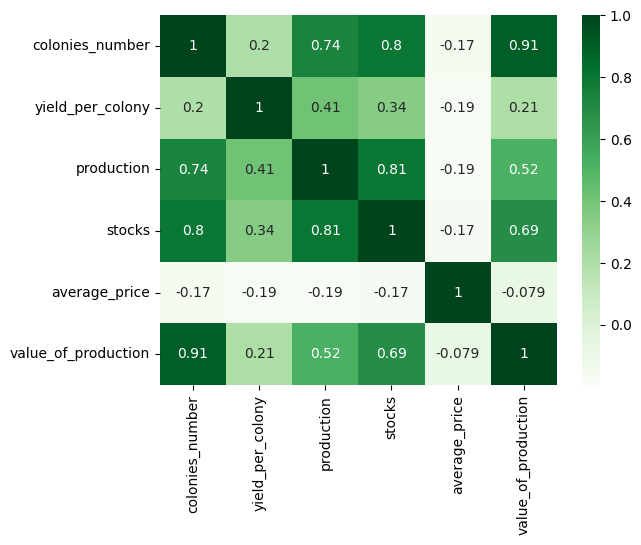

In [32]:
sns.heatmap(corrMat,annot= True, cmap = 'Greens')
plt.show()

**Insight**
* Value of prod is highly correlated with colonies as if num of colonies increase -> production also incrase
* Num of colonies -> High positive correlated with total production, stock, value of production

###**Let's Visualize the top states with the honey production**

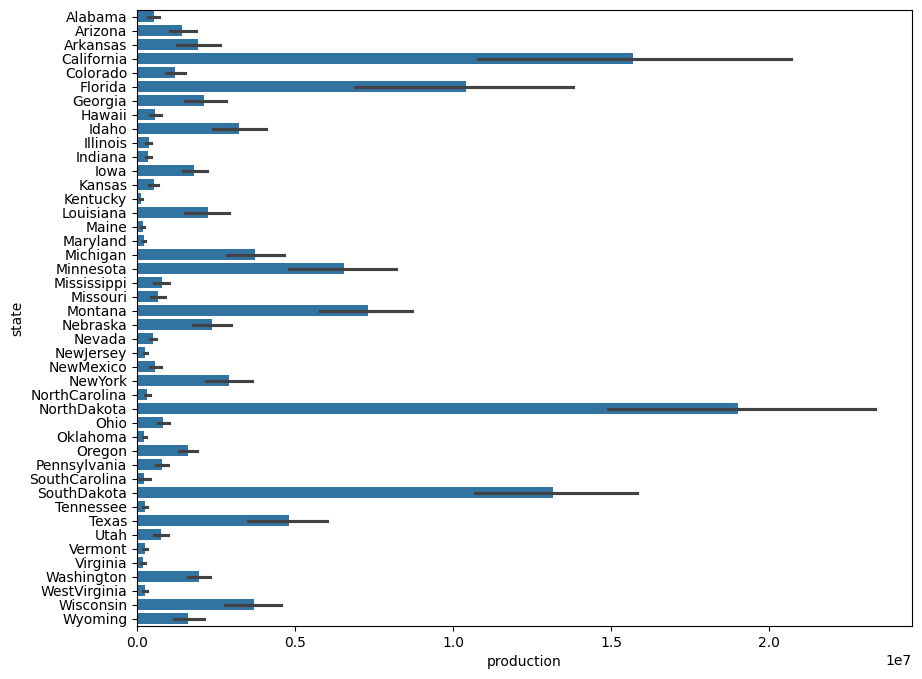

In [33]:
plt.figure(figsize = (10,8))
sns.barplot(x=df['production'],y=df['state'])
plt.show()

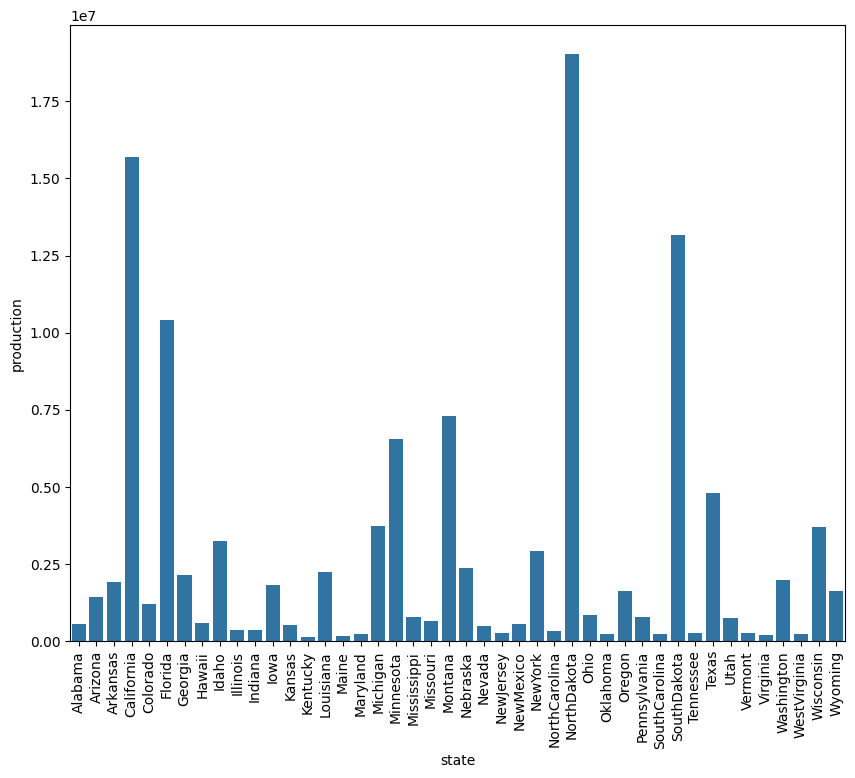

In [34]:
plt.figure(figsize = (10,8))
sns.barplot(y=df['production'],x=df['state'],ci=None)
plt.xticks(rotation=90)
plt.show()

**Five States with highest production**

In [ ]:
state_sorted = df.groupby('state', as_index= False)['production'].sum().sort_values(by = 'production', ascending= False)
state_sorted.head()

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


**Five States with highest production**
* North Dakota
* California
* South Dakota
* Florida
* Montana

**Year wise production trend**

In [35]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [36]:
numData

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,16000,58,928000,28000,62.00,575000
1,52000,79,4108000,986000,68.00,2793000
2,50000,60,3000000,900000,64.00,1920000
3,420000,93,39060000,4687000,60.00,23436000
4,45000,60,2700000,1404000,68.00,1836000
...,...,...,...,...,...,...
1110,6000,40,79000,79000,8.23,1975000
1111,96000,32,1206000,1206000,2.52,7741000
1112,6000,43,136000,136000,4.80,1238000
1113,42000,47,750000,750000,2.81,5547000


In [37]:
df1 = df[['year'] + list(numData.columns)].groupby('year').mean()

In [38]:
df1

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06


In [39]:
df1.reset_index(inplace=True)
df1

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


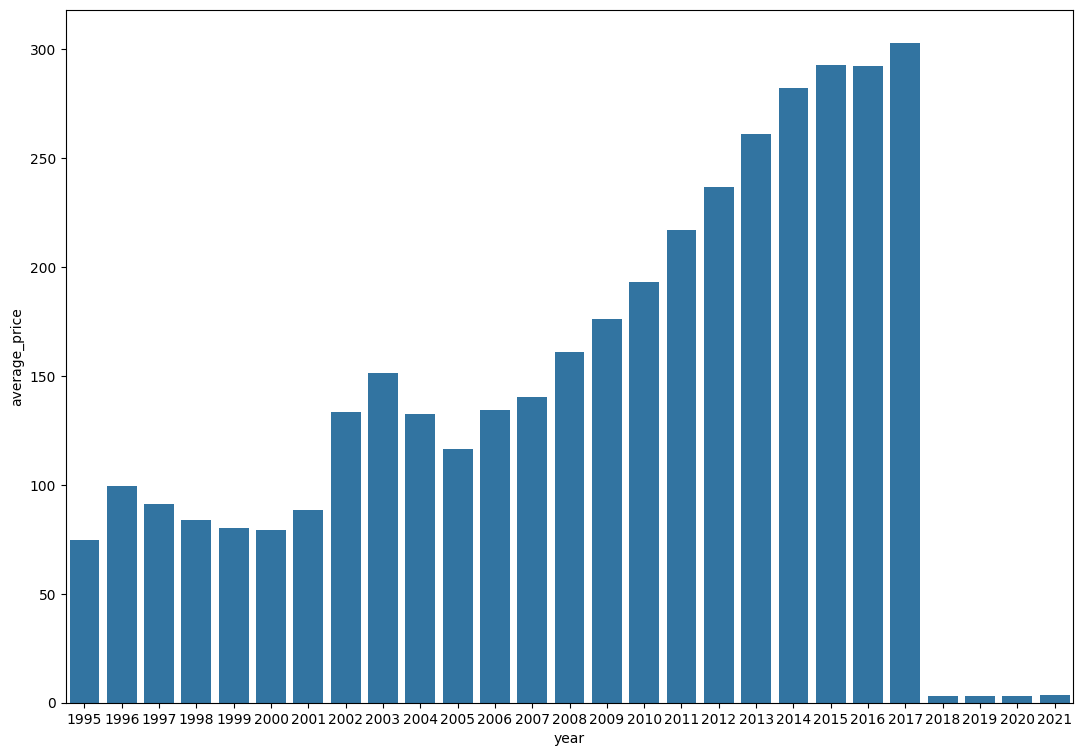

In [40]:
plt.figure(figsize=(13,9))
sns.barplot(x = df1.year, y=df1.average_price)
plt.show()

**Insight**
* We had the highest average price in the year in 2017
* In year 2018, we were having the lowest avg price (18-21)

In [41]:
df[df.production == df.production.max()]

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.0,23436000,1995


**Through Pie Chart**

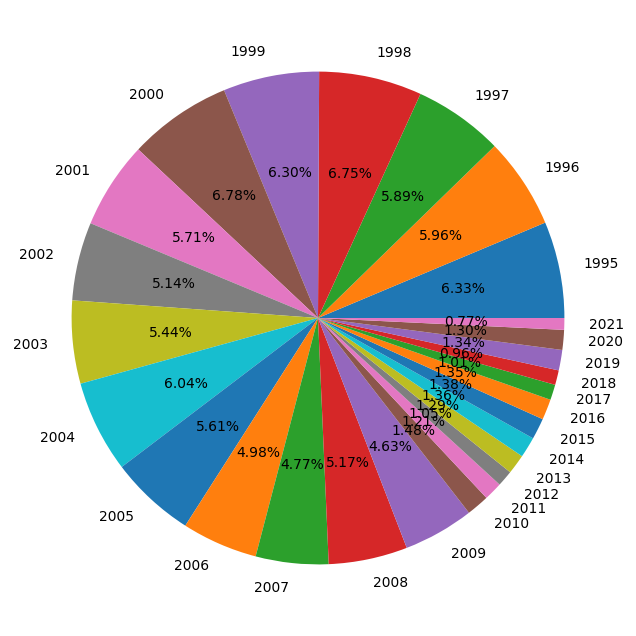

In [42]:
plt.figure(figsize = (10,8))
plt.pie(df1.production, labels=df1['year'],autopct = '%0.2f%%')
plt.show()

###**Trend Analysis**
**We will have a look on the trend on prduction**

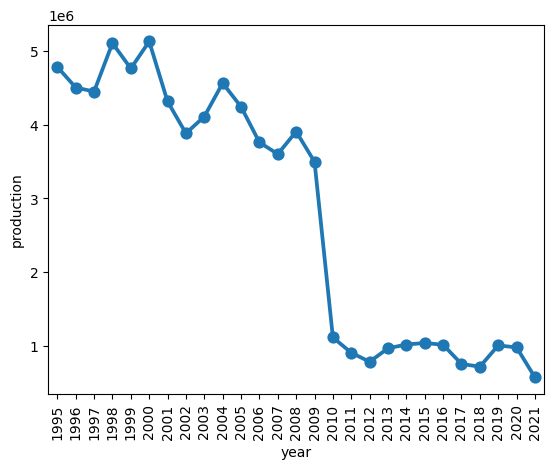

In [43]:
sns.pointplot(x = 'year',y='production',data=df,ci=None)
plt.xticks(rotation = 90)
plt.show()

Let's do the same for colonies

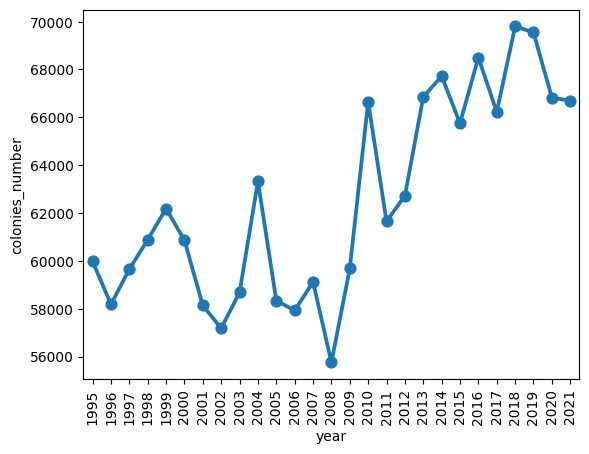

In [44]:
sns.pointplot(x = 'year',y='colonies_number',data=df,ci=None)
plt.xticks(rotation = 90)
plt.show()

##**Conclusion**
* The number of colonies accross the couuntry shows a positive trend overall but the production shows the negative trend (Honey bees are getting reduced even though the colonies are high)
* It might possible that some interventions in 2008 was introduced to increase the number of honey bee colonies
* Still keeping large amount of colonies didnt helped in keeping up the production